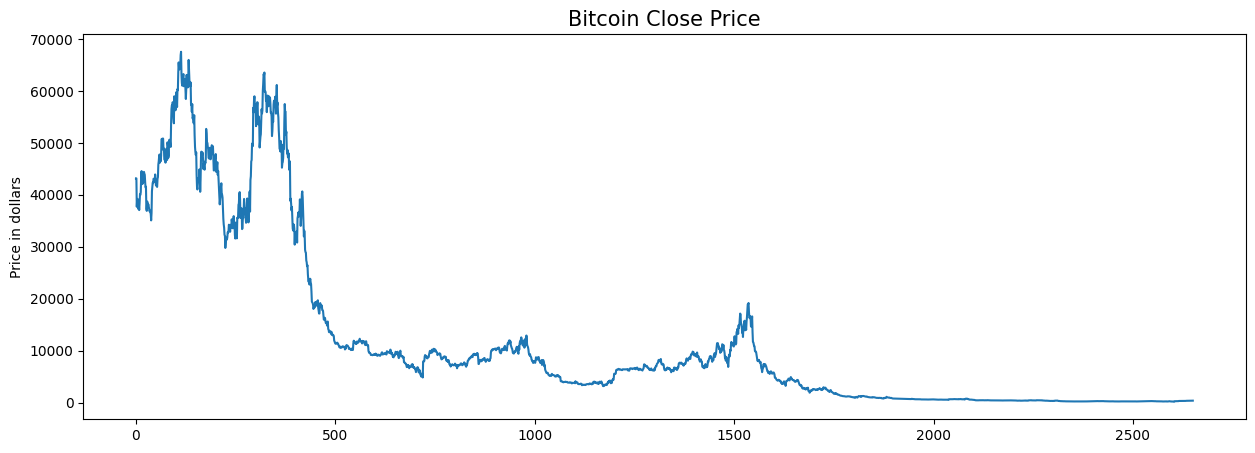

Missing Values:
 unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64


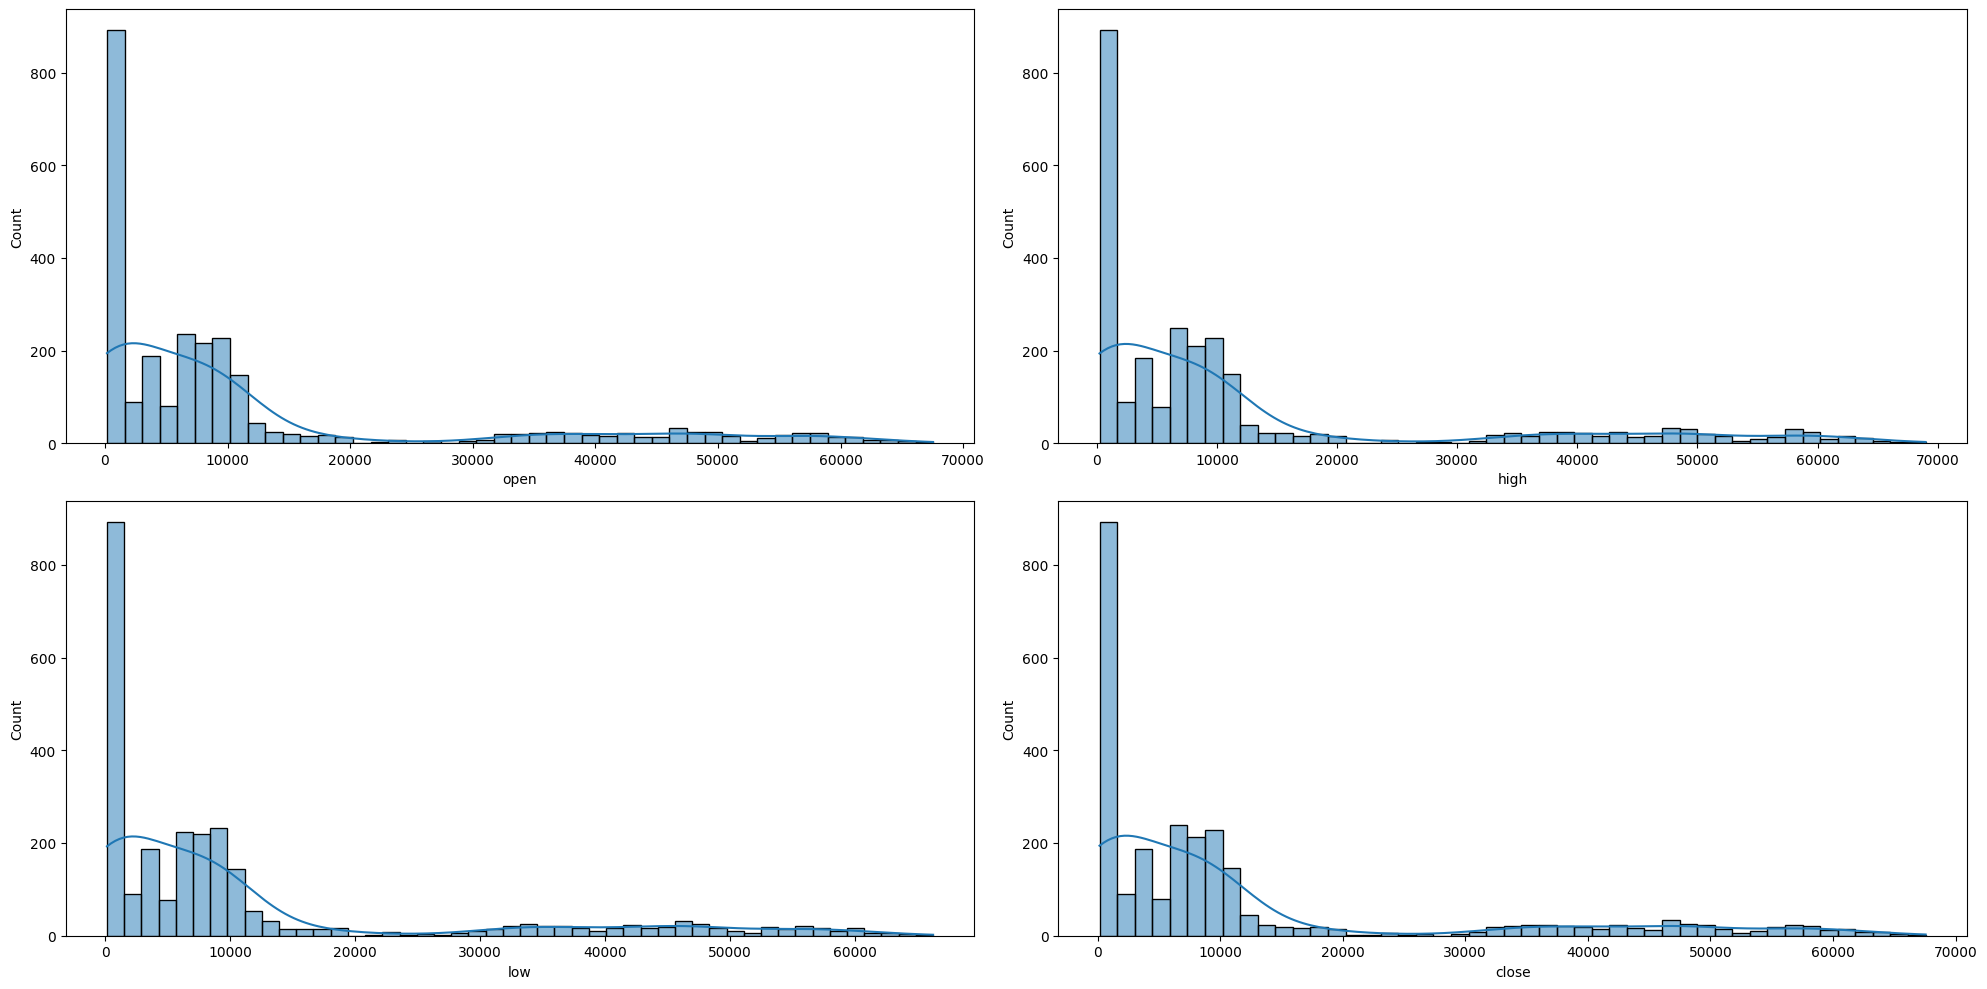

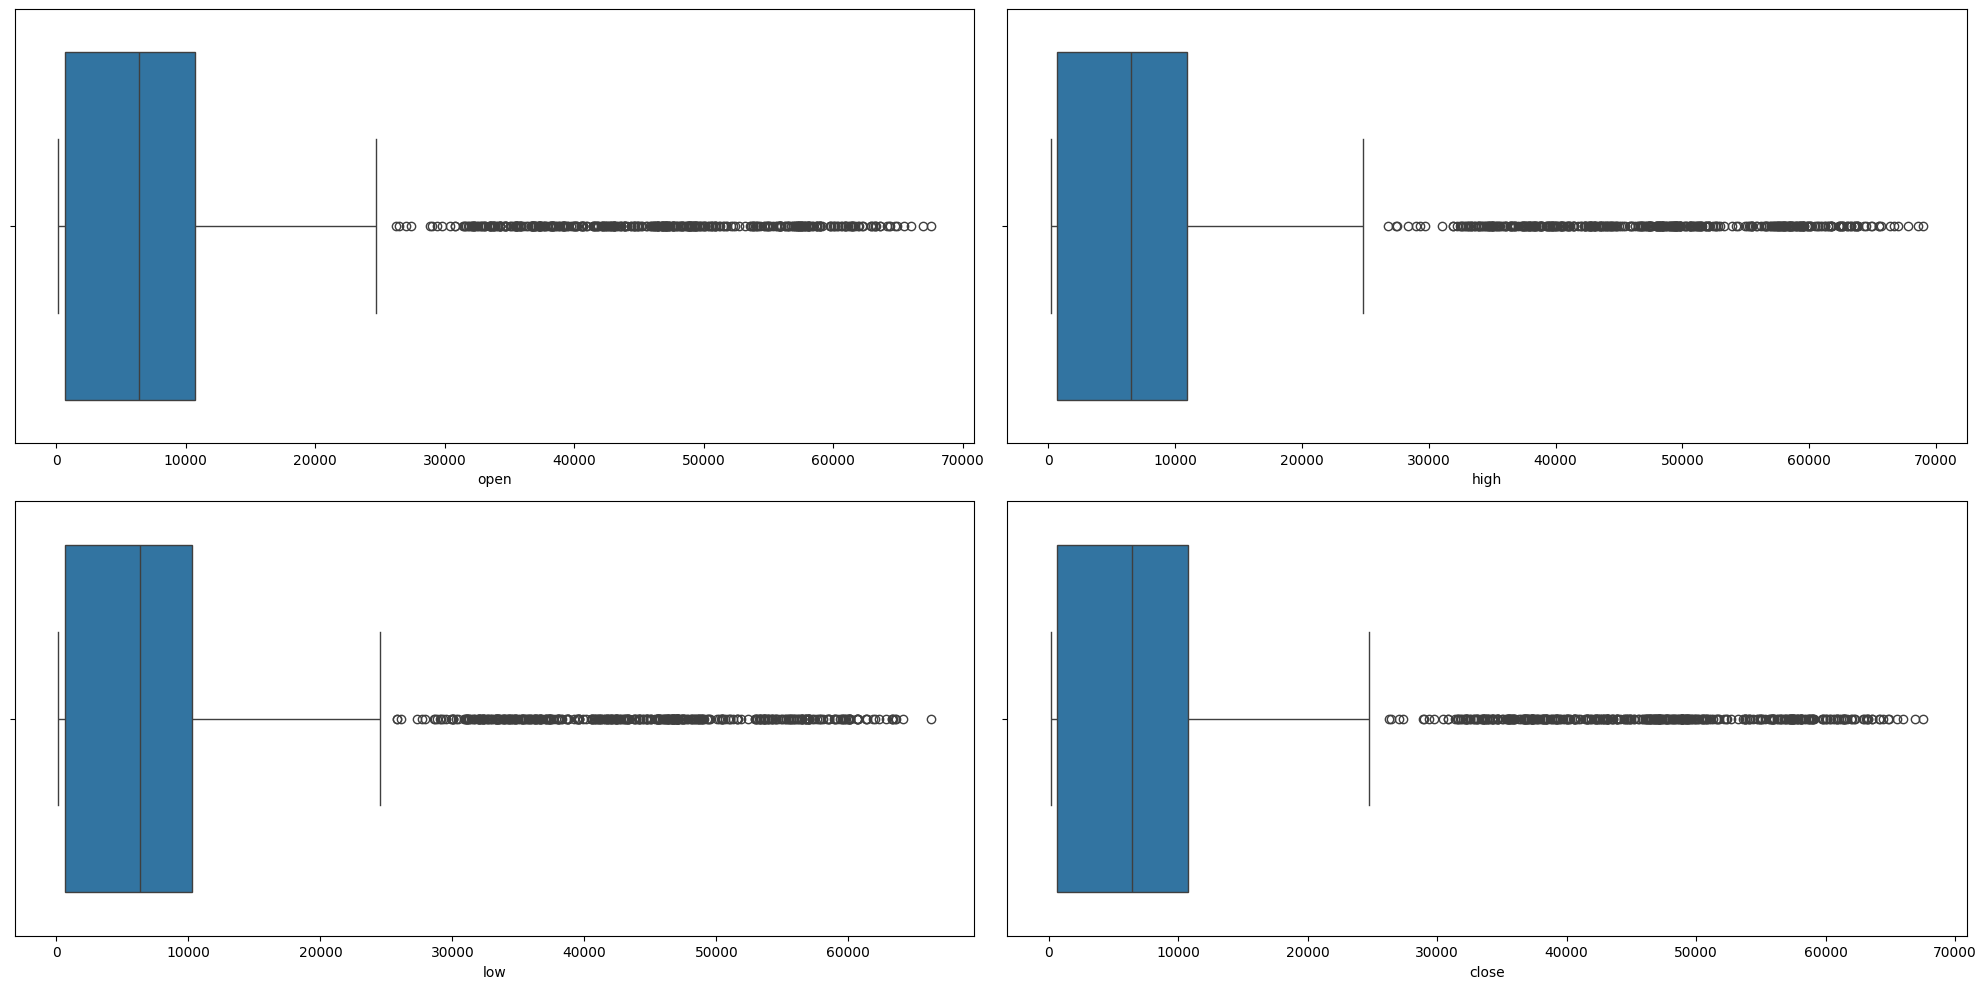

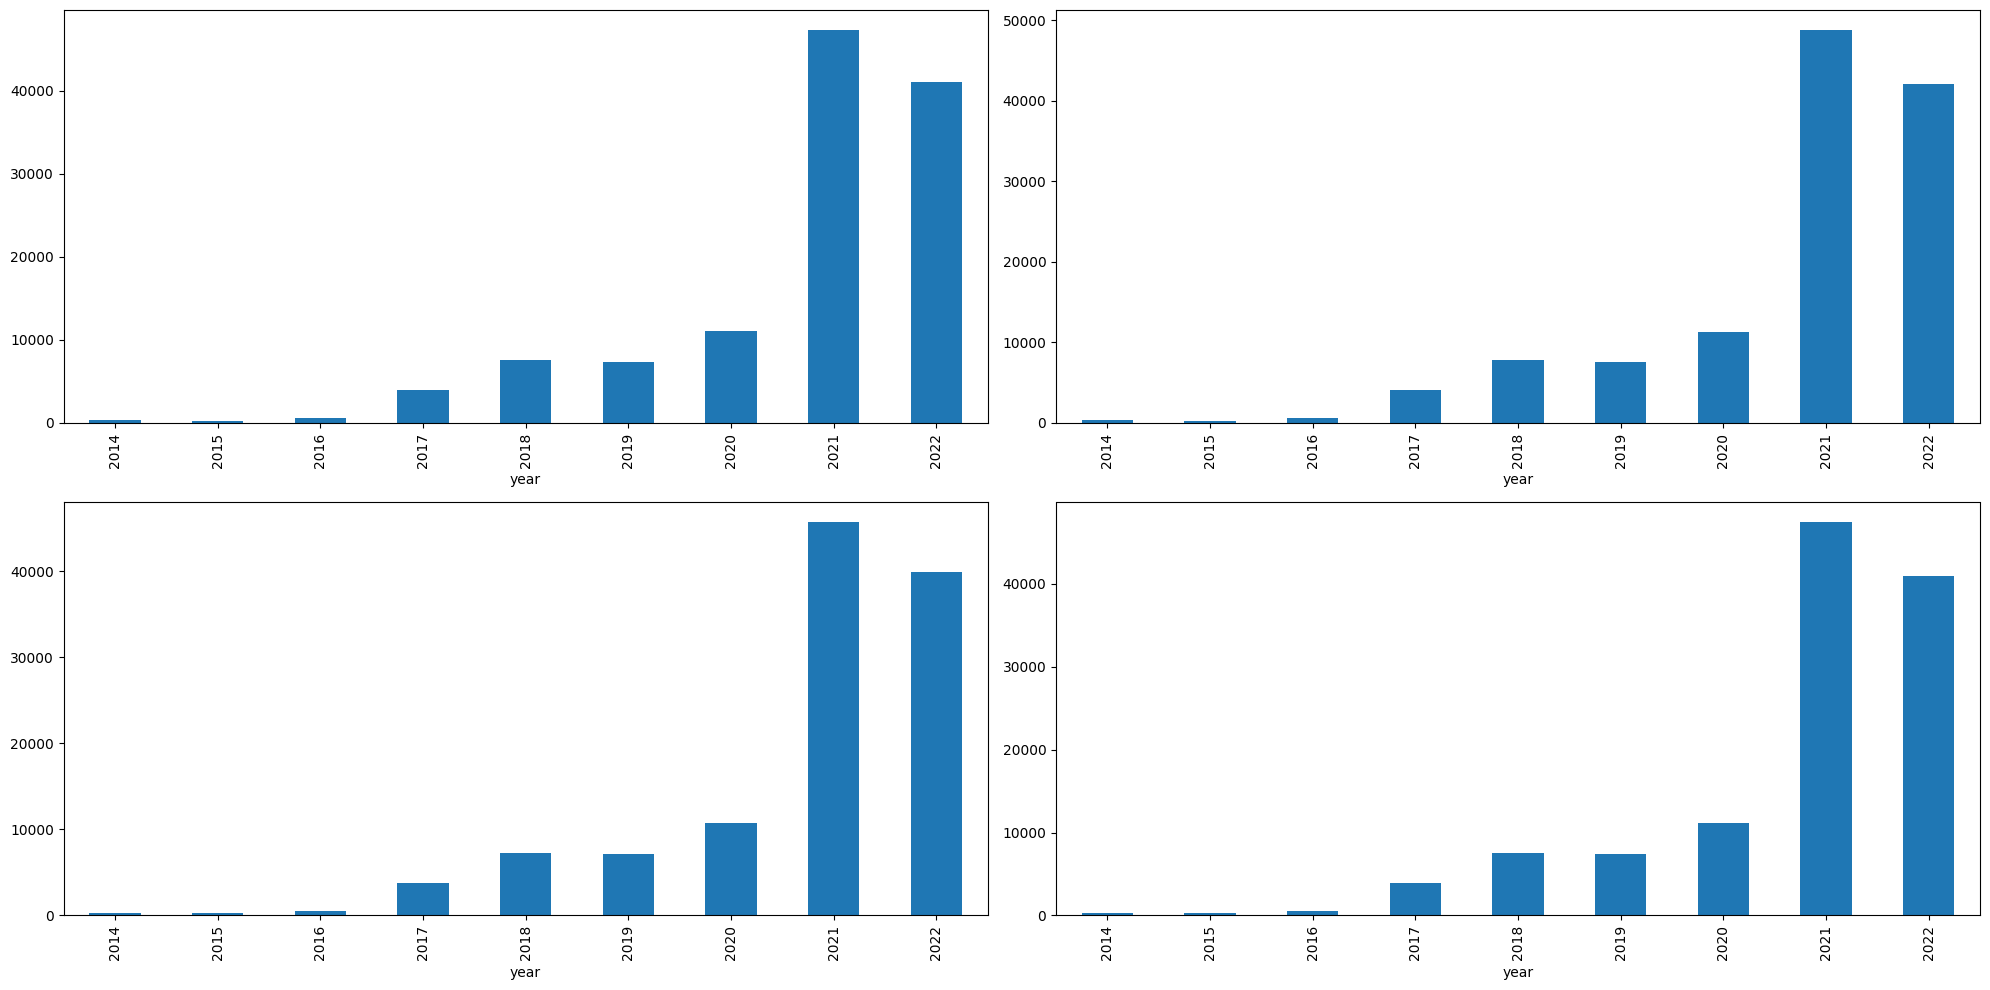

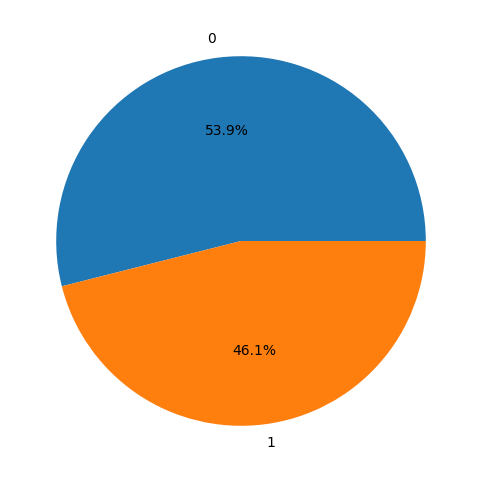

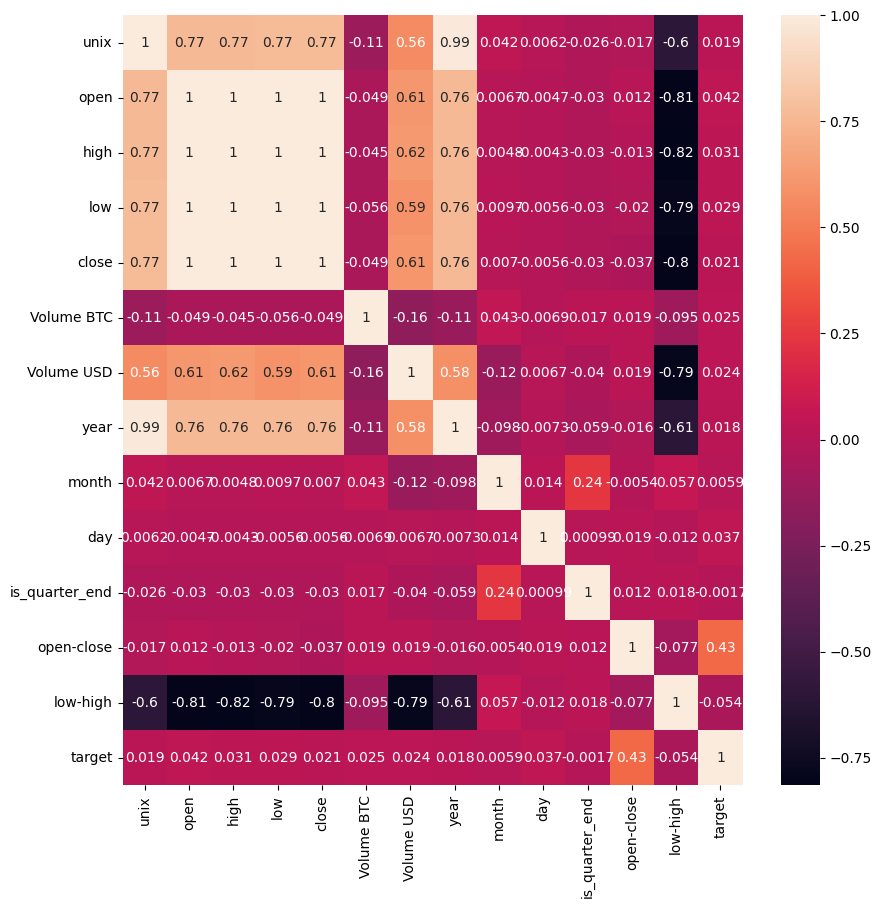

[('Logistic Regression', np.float64(0.9958426991739187), np.float64(0.993468877782826))]


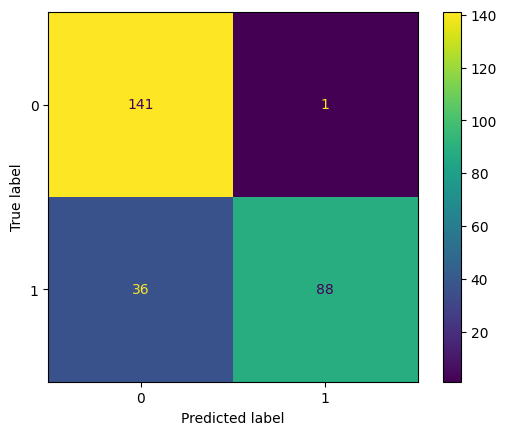

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

# Load the dataset
df = pd.read_csv('BTC-Daily.csv')  # Make sure to provide the correct path to your CSV file

# Visualizing Bitcoin close price
plt.figure(figsize=(15, 5))
plt.plot(df['close'])
plt.title('Bitcoin Close Price', fontsize=15)
plt.ylabel('Price in dollars')
plt.show()

# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Plotting distributions of open, high, low, close
features = ['open', 'high', 'low', 'close']
plt.figure(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sb.histplot(df[col], kde=True)
plt.tight_layout()
plt.show()

# Plotting box plots for open, high, low, close
plt.figure(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sb.boxplot(x=df[col])
plt.tight_layout()
plt.show()

# Extracting year, month, day from the date column
splitted = df['date'].str.split(' ', expand=True)[0].str.split('-', expand=True)
df['year'] = splitted[0].astype(int)
df['month'] = splitted[1].astype(int)
df['day'] = splitted[2].astype(int)

# Grouping by year for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
data_grouped = df.groupby('year')[numeric_cols].mean()

# Bar plot for grouped data
plt.figure(figsize=(20, 10))
for i, col in enumerate(['open', 'high', 'low', 'close']):
    plt.subplot(2, 2, i + 1)
    data_grouped[col].plot.bar()
plt.tight_layout()
plt.show()

# Feature Engineering
df['is_quarter_end'] = np.where(df['month'] % 3 == 0, 1, 0)
df['open-close'] = df['open'] - df['close']
df['low-high'] = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)

# Pie chart for target distribution
plt.figure(figsize=(6, 6))
plt.pie(df['target'].value_counts().values, labels=[0, 1], autopct='%1.1f%%')
plt.show()

# Correlation heatmap for numeric columns only
plt.figure(figsize=(10, 10))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
sb.heatmap(numeric_df.corr(), annot=True, cbar=True)
plt.show()


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


# df = df.sample(frac=0.5, random_state=42) 
# Selecting features and target
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

# Standardization
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Splitting data
X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)

# Initialize models
logreg = LogisticRegression(max_iter=100)

# Train Logistic Regression
logreg.fit(X_train, Y_train)
logreg_train_auc = metrics.roc_auc_score(Y_train, logreg.predict_proba(X_train)[:, 1])
logreg_valid_auc = metrics.roc_auc_score(Y_valid, logreg.predict_proba(X_valid)[:, 1])

# Store model results
model_results = [
    ("Logistic Regression", logreg_train_auc, logreg_valid_auc)
]

# Display results
print(model_results)

# Confusion matrix for Logistic Regression
metrics.ConfusionMatrixDisplay.from_estimator(logreg, X_valid, Y_valid)
plt.show()


